In [2]:
import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib
import torchinfo, torchmetrics

# Check PyTorch access (should print out a tensor)
# print(torch.randn(3, 3))

# Check for GPU (should return True)
# print(torch.cuda.is_available())

print(torch.__version__)
print(f"MPS 장치를 지원하도록 build가 되었는가? {torch.backends.mps.is_built()}")
print(f"MPS 장치가 사용 가능한가? {torch.backends.mps.is_available()}") 

# 디바이스 설정
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"사용 디바이스: {device}")


e = torch.rand(5, 3)
print(e)

2.4.0
MPS 장치를 지원하도록 build가 되었는가? True
MPS 장치가 사용 가능한가? True
사용 디바이스: mps
tensor([[0.6418, 0.9082, 0.3853],
        [0.1920, 0.6369, 0.7768],
        [0.3782, 0.3077, 0.8622],
        [0.3065, 0.7926, 0.2575],
        [0.8374, 0.7644, 0.8989]])


## Introduction to Tensors

### 1. Creating Tensors
Pytorch tensors are created using`torch.tensor() = https://pytorch.org/docs/stable/tensors.html`

In [3]:

# scalar
print("\n\n########## SCALAR")
scalar = torch.tensor(7)
print(scalar)
print(scalar.ndim) # scalar의 차원

# Get tensor back as Python int
print(scalar.item()) # scalar의 값



########## SCALAR
tensor(7)
0
7


In [4]:

# Vector
vector = torch.tensor([7, 7])
print(vector)
print(vector.ndim) # vector의 차원
print(vector.shape) # vector의 크기



########## VECTOR
tensor([7, 7])
1
torch.Size([2])


In [5]:
# Matrix
MATRIX = torch.tensor([[7,8],
                       [9,10]])
print(MATRIX)
print(MATRIX.ndim) # matrix의 차원
print(MATRIX[1])
print(MATRIX.shape) # matrix의 크기

tensor([[ 7,  8],
        [ 9, 10]])
2
tensor([ 9, 10])
torch.Size([2, 2])


In [7]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3,],
                        [3,6,9,],
                        [3,5,4]]])
print(TENSOR)
print(TENSOR.ndim) # tensor의 차원
print(TENSOR.shape) # tensor의 크기
print(TENSOR[0][0]) # 0번째 텐서의 0번째 요소

tensor([[[1, 2, 3],
         [3, 6, 9],
         [3, 5, 4]]])
3
torch.Size([1, 3, 3])
tensor([1, 2, 3])


### Random tensors

#### Why Random Tensors?
- Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

- 데이터 분석 및 모델 테스트를 위해 무작위 데이터를 생성하는 것이 중요.
- 무작위 데이터를 생성하면 모델이 데이터를 학습하고 예측하는 능력을 평가할 수 있음.

`start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers `


In [8]:
print("\n\n########## RANDOM TENSORS")

#Create random tensor of size (3, 4)
random_tensor = torch.rand(1, 3, 4)
print(random_tensor)
print(random_tensor.ndim)# 텐서의 차원
print(random_tensor.shape)# 텐서의 크기



########## RANDOM TENSORS
tensor([[[0.1384, 0.2180, 0.6383, 0.4042],
         [0.1864, 0.4526, 0.3141, 0.4745],
         [0.5441, 0.7380, 0.3949, 0.8289]]])
3
torch.Size([1, 3, 4])


In [9]:
# Create random tensor with similar shape to an image
random_image_size_tensor = torch.rand(224, 224, 3) # 높이, 너비, 색상 채널
print(random_image_size_tensor.shape, random_image_size_tensor.ndim)

torch.Size([224, 224, 3]) 3


### Zerps and ones

In [10]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
# Create a tensor of all ones 
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [13]:
ones.dtype

torch.float32

In [14]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [22]:
# Use torch.range() and get deprecated message, use torch.arange() instead
one_to_ten = torch.arange(start=1, end=1000, step=77) # 1부터 1000까지 77씩 증가하는 텐서
one_to_ten = torch.arange(start=1, end=11, step=1) # 1부터 10까지 1씩 증가하는 텐서
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
torch.__version__

'2.4.0'

In [23]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor data types

**Note** : Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning.

1. Tensors not data types
2. Tensors not device
3. Tensors not shape


Precision in computing = 데이터의 정밀도
https://en.wikipedia.org/wiki/Precision_(computer_science)

> 데이터 타입, 장치, 형태를 관리하는 것은 PyTorch에서 딥 러닝 모델 작성 시 필수적인 작업입니다.

#### 데이터 타입의 종류
- PyTorch에서 지원하는 주요 데이터 타입:
	- float16, float32, float64: 부동 소수점 숫자.
	- int8, int16, int32, int64: 정수.
	- bool: 논리값.
	- complex32, complex64: 복소수.
- 데이터 타입은 정밀도와 메모리 사용량에 영향을 미칩니다.
	- float16: 더 적은 메모리를 사용하며 연산 속도가 빠르지만, 정밀도가 낮습니다.
	- float32: 기본 데이터 타입으로, 적당한 정밀도와 메모리 사용량을 가집니다.
	- float64: 높은 정밀도와 더 많은 메모리 사용량.

#### 데이터 타입 선택의 중요성
- 정밀도:
	- float16: 메모리 절약 및 빠른 계산이 필요한 경우.
	- float32: 일반적인 상황에서 사용.
	- float64: 높은 정밀도가 필요한 경우.
- 메모리 및 성능:
	- 더 낮은 비트 수의 데이터 타입(float16)은 더 적은 메모리를 사용하고 계산 속도가 빠름.

#### 실수할 수 있는 주요 문제
1.	데이터 타입 불일치:
	- 서로 다른 데이터 타입의 텐서로 연산을 시도할 경우 오류 발생.
2.	장치 불일치:
	- 텐서가 CPU와 GPU에 각각 위치할 경우 연산 불가능.
	- 동일한 장치로 이동 필요:
3.	형태 불일치:
	- 텐서의 차원이나 크기가 다르면 연산 불가능.

In [55]:
# Float 32 tensor 
# 단일 정밀도
# 대부분의 경우 32비트 정밀도를 사용하는 것이 좋음.
# 메모리를 많이 사용하지만 정밀도가 높음.(더 정밀한 작업이 필요한 경우 64비트 정밀도를 사용)
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=torch.float32, # 데이터 타입을 지정하고 싶다면 dtype 매개변수를 사용 | What datatype is the tensor(e.g. float32 or float16) - 부동 소수점, 정수, 복소수 등 선택 가능.
                               device="mps", # 텐서가 위치할 장치('cuda(gpu)', 'mps', 'cpu') | What device is your tensor on?
                               requires_grad=False # 텐서의 그래디언트를 추적할지 여부. | 기본값은 False, 역전파 계산에 필요할 경우 True로 설정.
                               )

float_32_tensor

tensor([3., 6., 9.], device='mps:0')

In [46]:
float_32_tensor.dtype

torch.float32

In [53]:
# Float 16 tensor
# 하프 플로트 타입은 메모리를 절반으로 줄이고 속도를 높일 수 있음.
# 정밀도가 낮음.
# float_16_tensor = torch.tensor([3.0, 6.0, 9.0], dtype=torch.float16)
# float_16_tensor

float_16_tensor = float_32_tensor.to(torch.half)
float_16_tensor

tensor([3., 6., 9.], device='mps:0', dtype=torch.float16)

In [49]:
float_16_tensor.dtype


torch.float16

In [52]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.], device='mps:0')

In [59]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long, device="mps")
int_32_tensor

tensor([3, 6, 9], device='mps:0')

In [60]:
int_32_tensor * float_32_tensor

tensor([ 9., 36., 81.], device='mps:0')

### Getting information in tensors

1. Tensors not data types - to do get datatype from a tensor, can use `tensor.dtype`
2. Tensors not device - to get shape from a tensor, can use `tensor.shape`
3. Tensors not shape - to get device from a tensor, can use `tensor.device`


In [61]:
# Create a tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.9146, 0.1921, 0.8045, 0.6163],
        [0.6380, 0.7147, 0.8533, 0.0581],
        [0.3363, 0.0896, 0.1374, 0.5817]])

In [65]:
# find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.size()}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is stored on: {some_tensor.device}")

tensor([[0.9146, 0.1921, 0.8045, 0.6163],
        [0.6380, 0.7147, 0.8533, 0.0581],
        [0.3363, 0.0896, 0.1374, 0.5817]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Shape of tensor: torch.Size([3, 4])
Device tensor is stored on: cpu


### Manipulating tensors(tensor operations 텐서 연산)

Tensor operations include:
- Addition : 덧셈
- Subtraction : 뺄셈
- Multiplication(element-wise) : 요소별 곱셈
- Division : 나눗셈
- Matrix multiplication : 행렬 곱셈



In [75]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [76]:
# Multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [77]:
tensor 

tensor([1, 2, 3])

In [78]:
tensor -10

tensor([-9, -8, -7])

In [79]:
# try out pytorch in-built functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [85]:
torch.add(tensor, 13)

tensor([14, 15, 16])

### What is Matrix Multiplication? 행렬곱셈이란 무엇인가?

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise mujltiplcation
2. Matrix multiplication : 가장 기본적으로 찾을수 있는 기본 텐서 연산 (dot product) 
- more information on multiplying matrices : https://www.mathsisfun.com/algebra/matrix-multiplying.html
- 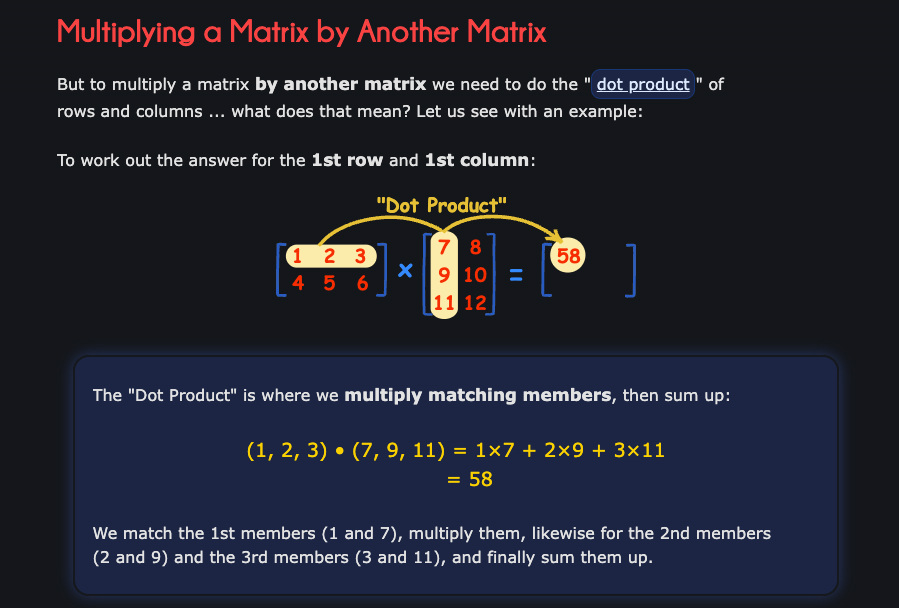

In [88]:
# Element-wise multiplication
print(tensor, "*", tensor)
print(f"Equals : {tensor * tensor}")


tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals : tensor([1, 4, 9])


In [89]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [97]:
%%time
# Matrix multiplication by hand 1
1 * 1 + 2 * 2 + 3 * 3

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs


14

In [95]:
%%time
# Matrix multiplication by hand 2

value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 642 µs, sys: 477 µs, total: 1.12 ms
Wall time: 768 µs


In [96]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 170 µs, sys: 71 µs, total: 241 µs
Wall time: 208 µs


tensor(14)

### One of the most common errors in deep learning : Shape Errors

- Shape errors occur when the dimensions of tensors do not match up.
- 텐서의 차원이 맞지 않는 경우 발생.
- 예를 들어, 두 텐서를 곱하려고 할 때 차원이 맞지 않으면 오류가 발생할 수 있음.

There are two rules that are performing or two main rules that performing matrix multiplication needs -
1. The **inner dimensions(차원)** must match. - 행렬 곱셈에서 내부 차원이 일치해야 함.
*   `(3, 2) @ (3, 2)` 에러
*   `(2, 3) @ (3, 2)` 작동
*   `(3, 2) @ (2, 3)` 작동
2. The resulting matrix has the shape of the ** outer dimenstions** - 결과 행렬의 차원은 외부 차원에 따라 결정됨.
*   `(3, 2) @ (2, 3)` -> `(3, 3)`
*   `(2, 3) @ (3, 2)` -> `(2, 2)`

In [126]:
# 내부차원 불일치 예시, 
# torch.matmul(torch.rand(2, 3), torch.rand(2, 5))


In [103]:
# 외부차원에 의해 결정된 행렬 결과
torch.matmul(torch.rand(3, 6), torch.rand(6, 5))

tensor([[0.6680, 1.4378, 1.8879, 1.4176, 1.3038],
        [0.9035, 0.9633, 1.8307, 0.8101, 1.4687],
        [0.9216, 1.3491, 2.3123, 1.4132, 1.6334]])

#### Shapes for matrix multiplication

- 행렬 곱셈에서 행렬의 차원은 다음과 같이 결정됨.
- 외부 차원은 결과 행렬의 차원이 되며, 내부 차원은 행렬 곱셈에 필요한 차원이 됨.
- 예를 들어, 두 행렬 `(3, 2)`와 `(2, 3)`의 곱셈은 결과 행렬의 차원이 `(3, 3)`이 됨.
- 이러한 원리를 이해하면 행렬 곱셈을 통해 원하는 결과를 얻을 수 있음.

In [125]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# tensor_A.shape, tensor_B.shape

# tensor.matmul(tensor_A, tensor_B) # torch.mm()  = torch.matmul() 


In [116]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape of our tensors using a **transpose**. - 텐서의 차원을 변경하여 문제를 해결할 수 있음.

A **transpose** switches the dimensions of a given tensor.


In [118]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [123]:
# The matrix multiplication operation works when tensor_B is transposed.
print(f"Original shapes: tensor_A: {tensor_A.shape}, tensor_B: {tensor_B.shape}")
print(f"New shapes : tensor_A: {tensor_A.shape}, tensor_B.T: {tensor_B.T.shape}")
print(f"Mutiplying : {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")

output = torch.mm(tensor_A, tensor_B.T)
print(output)

print(f"\nOutput shape : {output.shape}")

Original shapes: tensor_A: torch.Size([3, 2]), tensor_B: torch.Size([3, 2])
New shapes : tensor_A: torch.Size([3, 2]), tensor_B.T: torch.Size([2, 3])
Mutiplying : torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape : torch.Size([3, 3])


torch.Size([3, 3])

- 참조 페이지 : http://matrixmultiplication.xyz/ 
- 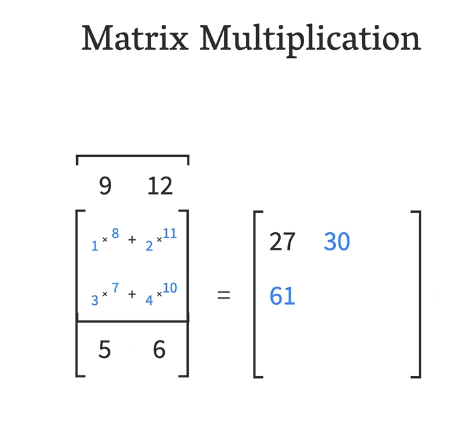
-  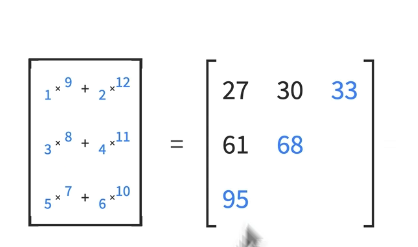

### 텐서 집계: 최소값, 최대값, 평균, 합계 등 계산하기 (Tensor Aggregation)

텐서 집계는 텐서 데이터에서 특정 값을 요약하거나 분석하기 위해 중요한 작업입니다. 예를 들어, 텐서의 최소값, 최대값, 평균, 합계 등을 구하는 과정이 포함됩니다. 이 작업은 대규모 데이터를 처리하고 요약하는 데 유용하며, 딥 러닝 모델에서도 자주 사용됩니다.


**텐서 집계(Aggregation)**는 텐서의 여러 값을 하나의 값으로 요약하는 작업입니다. 예를 들어:
- **최소값(min)**: 텐서에서 가장 작은 값.
- **최대값(max)**: 텐서에서 가장 큰 값.
- **평균(mean)**: 텐서 값의 평균.
- **합계(sum)**: 텐서 값의 총합.


#### 2. 텐서 생성 및 집계 연산

### 텐서 생성
`torch.arange()`를 사용하여 텐서를 생성할 수 있습니다. 예를 들어, 0에서 100까지 10씩 증가하는 텐서를 생성해보자.

In [144]:
# Create a tensor
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [140]:
# Find the minimum value in a tensor
torch.min(x), x.min()


(tensor(0), tensor(0))

In [137]:
# Find the maximum value in a tensor
torch.max(x), x.max()

(tensor(90), tensor(90))

In [138]:
# Find the mean value in a tensor
# Note : 기본값이 int64이므로 Long type 에러가 발생. float32로 변환하여 계산
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean() 

(tensor(45.), tensor(45.))

In [139]:
# Find the sum of all values in a tensor
torch.sum(x), x.sum()

(tensor(450), tensor(450))

## Finding the positional min and max

In [145]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [146]:
# Find the position in tensor that has the minimum value with `argmin()` -> returns index position of target tensor where the minimum value
# `argmin()`를 사용하여 최소값을 갖는 텐서의 위치를 찾은 다음 인덱스 위치를 반환
x.argmin() # 최소값의 인덱스 위치


tensor(0)

In [147]:
x[0] # 0번째 인덱스 위치의 값

tensor(1)

In [143]:
# Find the position in tensor that has the maximum value with `argmax()` -> returns index position of target tensor where the maximum value
# `argmax()`를 사용하여 최대값을 갖는 텐서의 위치를 찾은 다음 인덱스 위치를 반환
x.argmax() # 최대값의 인덱스 위치

tensor(9)

In [148]:
x[9] # 9번째 인덱스 위치의 값

tensor(91)

## Reshaping, stacking, squeezing, and unsqueezing tensors

* Reshaping = an input tensor to a defined shape : 입력 텐서를 정의된 형태로 변경하는 것.
* View = Return a view of an input tensor of certain shape but keep the same memory as the original tensor : 입력 텐서의 형태를 정의된 형태로 반환하면서 동일한 메모리를 유지하는 것.
* Stacking = combine multiple tensors on top of each other(vstack) or side by side (hstack) : 여러 텐서를 위로 쌓거나 옆으로 쌓는 것.
* Squeezing = remove all `1` dimensions from a tensor : 텐서에서 모든 `1` 차원을 제거하는 것.
* Unsqueezing = add a `1` dimension to a tensor : 텐서에 `1` 차원을 추가하는 것.



In [207]:
# create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

### 1. Reshaping 텐서 재구성
`torch.reshape()` 함수는 텐서의 크기(모양)를 변경합니다. 하지만 변경된 크기(모양)는 원래 텐서의 **원소 개수**와 호환되어야 함.

In [209]:
# Add an extra dimension
#  모양 변경 (3 x 3) : 기존의 원소 size가 9이기 때문에 3x3 텐서로 변경
x_reshaped = x.reshape(3, 3) # 1차원 텐서를 3x3 텐서로 변경
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

⚠ 주의: 텐서를 재구성하려면 새 모양이 기존 원소 수와 호환되어야 함.

### 2. View (Reshape와 유사하지만 메모리를 공유)

`torch.view()` 함수는 `reshape()`와 비슷하지만, 원래 텐서와 메모리를 공유합니다. 즉, `view()`를 사용해 생성된 텐서를 수정하면 원래 텐서도 변경됩니다.

In [168]:
# change the view
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [169]:
# Changing 'z' changes 'x'  = because a view of a tensor shares the same memory as the original input 
# : z와 x는 동일한 메모리를 공유하기 때문에 z를 변경하면 x도 반영됨.
z[:,0] = 5 # z의 0번째 열을 5로 변경
z, x # z를 변경하면 x도 반영됨.


(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

### 3. Stacking 텐서 결합

`torch.stack()` 함수는 여러 텐서를 새로운 차원에 따라 결합합니다. 이를 통해 텐서를 수직, 수평 등 다양한 방식으로 쌓을 수 있습니다.

In [170]:
# Stack tensors on top of each other
# Stack : 입력 텐서의 형태를 정의된 형태로 반환하면서 동일한 메모리를 유지하는 것.
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked, x_stacked.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 torch.Size([4, 9]))

### 4. Squeezing and unsqueezing 텐서 차원 제거 및 추가

- `torch.squeeze()` 함수는 텐서에서 크기가 1인 차원을 제거
- `torch.unsqueeze()` 함수는 텐서에 1 차원을 추가


In [181]:
# torch.squeeze() : 텐서에서 모든 1 차원을 제거하는 것.
print(f"Previeus tensor: {x_reshaped}")
print(f"Previeus tensor shape: {x_reshaped.shape}")

# Remove extra dimension
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New tensor shape: {x_squeezed.shape}")

Previeus tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previeus tensor shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New tensor shape: torch.Size([9])


In [190]:
# torch.unsqueeze() : 텐서에 1 차원을 추가하는 것.
print(f"Previeus tensor: {x_squeezed}")
print(f"Previeus tensor shape: {x_squeezed.shape}")

x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New tensor shape: {x_unsqueezed.shape}")

Previeus tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previeus tensor shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New tensor shape: torch.Size([1, 9])


### 5. Permute 텐서 차원 재배열

`torch.permute()` 함수는 텐서의 차원을 재배열합니다. 이를 통해 텐서의 차원을 원하는 순서로 변경할 수 있습니다.


In [196]:
# torch.permute() : 텐서의 차원을 재배열하는 것.
x_original = torch.rand(size=(224, 224, 3)) # 높이, 너비, 색상 채널

# Permute the original tensor to rearrange the dimensions
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0 -> 1, 1 -> 2,  2 -> 0

print(f"Original shape: {x_original.shape}")
print(f"Permuted shape: {x_permuted.shape}")



Original shape: torch.Size([224, 224, 3])
Permuted shape: torch.Size([3, 224, 224])


In [210]:
x_original[0,0,0] = 728218
x_original[0,0,0], x_permuted[0,0,0]

(tensor(728218.), tensor(728218.))

## Indexing (selecting data from tensors)

Indexing with Pyutorch is similar to indexing with NumPy.

In [229]:
# Create a tensor
import torch

x= torch.arange(1, 10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [230]:
# Indexing on a new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [231]:
# indexing on the middle braket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [233]:
# indexing on the most inner braket (dim=2, last dimension)
x[0][2][2]

tensor(9)

In [235]:
# You can also use ":" to select "all" of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [244]:
# Get all values of 0th and 1st dimensions but only inde 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [239]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
x[:, 2, 1]

tensor([8])

In [247]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

In [249]:
#INDEX ON X TO RETURN 9
x[0, 2, 2]

tensor(9)

In [251]:
# Index on x to return 3, 6, 9
x[ 0, :, 2]

tensor([3, 6, 9])